In [1]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
np.random.seed(107)
import matplotlib.pyplot as plt

In [2]:
import pandas_datareader as pdr
key='bfefa72b58ce16638e4384eb6beea09403def336'
df_a = pdr.get_data_tiingo('AAPL', api_key=key)
df_a.to_csv('aapl.csv')
df_a=pd.read_csv('aapl.csv')
df_a.tail()

/home/ohj/.local/lib/python3.10/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2023-03-21 00:00:00+00:00,159.28,159.4000,156.54,157.32,73938285,159.28,159.4000,156.54,157.32,73938285,0.0,1.0
1253,AAPL,2023-03-22 00:00:00+00:00,157.83,162.1400,157.81,159.30,75701811,157.83,162.1400,157.81,159.30,75701811,0.0,1.0
1254,AAPL,2023-03-23 00:00:00+00:00,158.93,161.5501,157.68,158.83,67622060,158.93,161.5501,157.68,158.83,67622060,0.0,1.0
1255,AAPL,2023-03-24 00:00:00+00:00,160.25,160.3400,157.85,158.86,59256343,160.25,160.3400,157.85,158.86,59256343,0.0,1.0
1256,AAPL,2023-03-27 00:00:00+00:00,158.28,160.7700,157.87,159.94,52390266,158.28,160.7700,157.87,159.94,52390266,0.0,1.0


In [5]:
df_a=df_a.set_index(['date'])
df_a.head()

,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,,
2018-03-29 00:00:00+00:00,AAPL,167.78,171.75,166.90,167.81,38398505,39.932914,40.877804,39.723467,39.940054,153594020,0.0,1.0
2018-04-02 00:00:00+00:00,AAPL,166.68,168.94,164.47,166.64,37586791,39.671106,40.209003,39.145109,39.661585,150347164,0.0,1.0
2018-04-03 00:00:00+00:00,AAPL,168.39,168.75,164.88,167.64,30278046,40.078099,40.163781,39.242692,39.899593,121112184,0.0,1.0
2018-04-04 00:00:00+00:00,AAPL,171.61,172.01,164.77,164.88,34605489,40.844483,40.939686,39.216511,39.242692,138421956,0.0,1.0
2018-04-05 00:00:00+00:00,AAPL,172.80,174.23,172.08,172.58,26933197,41.127712,41.468063,40.956347,41.075350,107732788,0.0,1.0


In [90]:
symbol_list=['GOOGL','MSFT','AMZN','NVDA','LRCX','AMAT']
def generate_df(symbols):
    final_df=df_a[['close']].rename(columns={'open':'AAPL'})
    for sym in symbols:
        df=pd.read_csv('{}.csv'.format(sym))
        df_price=df[['close']]
        df_price=df_price.rename(columns={'close':sym})
        final_df=pd.concat([final_df,df_price],axis=1)
    return final_df
def get_data(symbols):
    for sym in symbols:
        df=pdr.get_data_tiingo(sym,api_key=key)
        df.to_csv('{}.csv'.format(sym))
def get_pricing(sym, fields, start_date, end_date):
    df=pdr.get_data_tiingo(sym,api_key=key)
    df.to_csv('{}.csv'.format(sym))
    df=pd.read_csv('{}.csv'.format(sym))
    df=df.set_index(['date'])
    return pd.DataFrame(df_a.loc[start_date:end_date,fields]).rename(columns={'close':sym})
def draw_portfolio(symbols,start,end):
    _, ax1 = plt.subplots()
    for sym in symbols:
        df=get_pricing(sym,'close',start,end)
        ax1.plot(df)
def build_portfolio(symbols,start,end,weights):
    portfolio=weights[0]*get_pricing(symbols[0],'close', start, end
                                    ).pct_change()[1:]
    for i,sym in enumerate(symbols[1:]):
        added=weights[i]*get_pricing(sym, 'close', start, end
                                    ).pct_change()[1:]
        portfolio=pd.concat([portfolio,added],axis=1)
    portfolio['weighted_sum']=sum([portfolio[col] 
                                   for col in portfolio.columns])
    return portfolio
def sharp_ratio(risk_free,asset):
    return np.mean(asset-risk_free)/np.std(asset-risk_free)

/home/ohj/.local/lib/python3.10/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)
/home/ohj/.local/lib/python3.10/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)
/home/ohj/.local/lib/python3.10/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)
/home/ohj/.local/lib/python3.10/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)
/home/ohj/.local/lib/python3

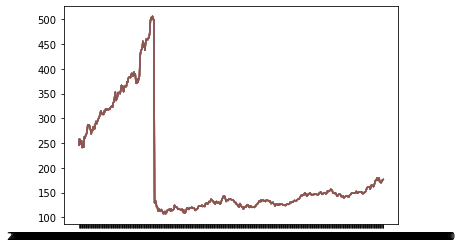

In [91]:
draw_portfolio(symbol_list,start,end)

In [36]:
symbol_list=['GOOGL','MSFT','AMZN','NVDA','LRCX','AMAT']
weighting=[17,10,26,10,17,17,3]
get_data(symbol_list)

/home/ohj/.local/lib/python3.10/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [71]:
start='2018-04-05'
end='2023-03-24'
portfolio=build_portfolio(symbol_list,start,end,weighting)

In [61]:
sharp_ratio(treasury.values[0:100],returns.values[0:100])

-0.1813146073610137

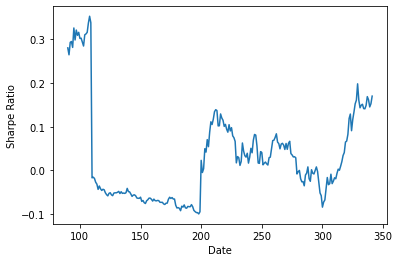

In [72]:
treasury=get_pricing('BIL', 'close', start, end).pct_change()[1:]
returns=portfolio[['weighted_sum']]
start='2020-03-25'
end='2021-12-24'
def run_sharpe(symbol_list,start,end,weighting):
    treasury=get_pricing('BIL', 'close', start, end).pct_change()[1:]
    portfolio=build_portfolio(symbol_list,start,end,weighting)
    returns=portfolio[['weighted_sum']]
# Compute the running Sharpe ratio
    running_sharpe = [sharp_ratio(treasury.values[i-90:i], 
                                  returns.values[i-90:i]) 
                      for i in range(90, len(returns))]

# Plot running Sharpe ratio up to 100 days before the end of the data set
    _, ax1 = plt.subplots()
    ax1.plot(range(90, len(returns)-100), running_sharpe[:-100]);
#ax1.set_xticklabels([returns.index[i].date() for i in ticks[:-1]]) # Label x-axis with dates
    plt.xlabel('Date')
    plt.ylabel('Sharpe Ratio')
run_sharpe(symbol_list,start,end,weighting)

Mean of running Sharpe ratio: -0.06488449633200548
std of running Sharpe ratio: 0.1122208855660391


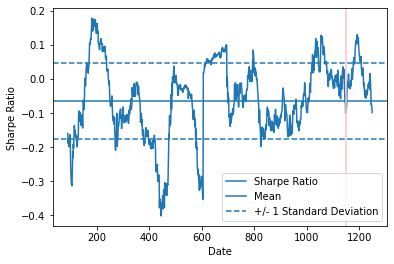

In [73]:
# Compute the mean and std of the running Sharpe ratios up to 100 days before the end
mean_rs = np.mean(running_sharpe[:-100])
std_rs = np.std(running_sharpe[:-100])

# Plot running Sharpe ratio
_, ax2 = plt.subplots()
#ax2.set_xticklabels([pricing.index[i].date() for i in ticks[:-1]]) # Label x-axis with dates
ax2.plot(range(90, len(returns)), running_sharpe)

# Plot its mean and the +/- 1 standard deviation lines
ax2.axhline(mean_rs)
ax2.axhline(mean_rs + std_rs, linestyle='--')
ax2.axhline(mean_rs - std_rs, linestyle='--')

# Indicate where we computed the mean and standard deviations
# Everything after this is 'out of sample' which we are comparing with the estimated mean and std
ax2.axvline(len(returns) - 100, color='pink');
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend(['Sharpe Ratio', 'Mean', '+/- 1 Standard Deviation'])

print('Mean of running Sharpe ratio:', mean_rs)
print('std of running Sharpe ratio:', std_rs)

In [77]:
ma_50=lrcx_price.rolling(50)[50:].mean()
ma_200=lrcx_price.rolling(200).mean()

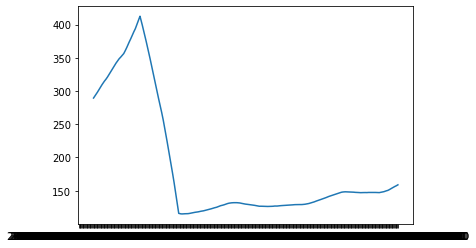

In [92]:
plt.plot(ma_50)